In [1]:
# Set a seed value
seed_value = 999 

# 1. Initialise `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Initialise Python's own pseudo-random generator
import random
random.seed(seed_value)

# 3. Initialise Numpy's pseudo-random generator
import numpy as np
np.random.seed(seed_value)

import warnings
warnings.filterwarnings("ignore")

import pandas as pd



In [2]:
pd.set_option('display.max_columns',None)

Down syndrome is a genetic disorder caused when abnormal cell division results in an extra full or partial copy of chromosome 21. This extra genetic material causes the developmental changes and physical features of Down syndrome. It's the most common genetic chromosomal disorder and cause of learning disabilities in children. In our study, we will learn how different Hsa21 genes that are critical to learning and memory reacts when exposed with different drugs. 
For practical evaluation of drug effects, multiple mouse models of DS, each carrying an extra copy of a subset of Hsa21 orthologous genes, have been created. Moreover, protein profiles have been measured for 77 proteins that are responsible for associative learning in both cases where they are injected with Memantine drug and injected with no drug (saline).


In [3]:
raw_data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls')

In [4]:
raw_data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

The dataset used here is sourced from https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There were 38 control mice and 34 trisomic mice, for a total of 72 mice. 
The data  is of multivariate characteristics that contains 82 features in total with a total of 1080 observations. Information regarding each feature is given below

    1 Mouse ID of
    2 to 78 Values of expression levels of 77 proteins; the names of proteins indicating that they were measured in the nuclear fraction. 
    79 Genotype: control (c) or trisomy (t)
    80 Treatment type: memantine (m) or saline (s)
    81 Behavior: context-shock (CS) or shock-context (SC)
    82 Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m 


In [5]:
raw_data.shape

(1080, 82)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
MouseID            1080 non-null object
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAF_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null 

In [7]:
# dropping 'MouseID' column as it can cause data leakage
# Not dropping 'Genotype','Treatment','Behavior' , will be using it for the exploration purpose
raw_data.drop(columns = ['MouseID'],inplace=True)

In [8]:
# checking for the count of features of different types
raw_data.dtypes.value_counts()

float64    77
object      4
dtype: int64

All the descriptive features are numerical in our dataset.

In [9]:
raw_data.shape

(1080, 81)

In [10]:
raw_data.sample(5,random_state=99)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
734,0.257820,0.466881,0.298298,2.015869,3.039328,0.235971,0.207682,2.788178,0.258280,1.295998,0.305198,0.324747,0.297838,0.280359,0.733901,0.814167,1.366605,1.140754,0.424793,0.731601,0.236201,0.364765,0.209522,0.968951,2.068077,0.911224,0.231141,0.280589,0.575667,0.172263,0.426633,1.960672,1.202852,0.464811,0.509660,0.829577,0.642364,0.358786,0.550828,0.338546,0.378565,0.445722,0.354876,0.140883,0.793563,0.168520,1.271992,0.297101,0.294068,1.193967,0.128244,0.191776,0.165319,0.132963,0.157061,0.172565,0.128413,0.130435,0.275194,0.163633,0.600607,0.272835,1.868049,2.267442,0.193124,1.299461,0.826424,0.205426,0.203910,NaN,0.132963,0.158578,0.468318,NaN,0.314459,NaN,1.092349,Ts65Dn,Memantine,S/C,t-SC-m
815,0.408919,0.639280,0.332590,2.507204,4.900172,0.255060,0.181132,5.221269,0.238937,1.445798,0.407376,0.336707,0.348199,0.303087,0.888851,0.819554,1.817839,1.305660,0.466209,0.783877,0.316123,0.407547,0.187650,1.101887,2.352830,1.243911,0.240995,0.275815,0.779417,0.164151,0.489365,2.604631,0.681990,0.498628,0.518868,0.928473,0.661750,0.357804,0.644254,0.342710,0.352487,0.449914,0.403259,0.173097,1.164297,0.150372,1.507398,0.276666,0.324727,1.486123,0.123586,0.150082,0.199304,0.148051,0.170970,0.187699,0.190987,0.116333,0.266512,0.152596,0.621217,0.261000,1.783096,2.575670,0.178706,1.459240,0.956581,0.231602,NaN,NaN,0.148051,0.121652,0.434677,NaN,NaN,0.186442,1.062180,Ts65Dn,Memantine,S/C,t-SC-m
926,0.413542,0.734173,0.308031,2.244724,3.817823,0.216032,0.165326,2.045241,0.192500,1.186124,0.508426,0.344466,0.309701,0.244269,0.754365,0.600121,1.495825,2.014422,0.446182,0.637923,0.359800,0.335206,0.153788,1.127220,2.939730,1.387885,0.241840,0.265827,0.769242,0.166692,0.453773,2.104448,0.325793,0.382268,0.273569,0.615455,0.543191,0.327463,0.472446,0.344466,0.250645,0.399727,0.250797,0.201794,0.893184,0.154170,1.926368,0.347354,0.442152,1.540269,0.094619,0.141794,0.176861,0.105830,0.147982,0.126368,0.179731,0.112197,0.186906,0.102332,0.451928,0.266099,1.455964,2.207892,0.125112,1.242960,0.898296,0.192108,0.136951,0.107534,0.105830,0.107713,0.518386,0.110583,0.140987,0.148700,1.762780,Ts65Dn,Saline,C/S,t-CS-s
177,0.269688,0.408125,0.317188,2.138750,3.045000,0.314375,0.225000,5.321562,0.225938,1.347500,0.457188,0.391250,0.306875,0.348750,0.815000,1.046250,1.577187,1.105000,0.527188,0.696250,0.299063,0.407187,0.200937,0.953438,1.711250,0.890938,0.255937,0.291563,0.639375,0.215938,0.386250,1.825000,0.741875,0.551250,0.655625,0.960000,0.713125,0.364375,0.675937,0.370625,0.435000,0.497812,0.523750,0.145773,0.870599,0.156762,1.781117,0.321148,0.305450,0.752411,0.145548,0.184795,0.153398,0.121776,0.174927,0.171115,0.177394,0.139045,0.331016,0.177394,0.700606,0.326979,1.925768,2.597668,0.218883,1.478807,0.860283,0.247589,0.229199,0.213949,0.121776,0.205876,0.484189,0.242880,0.340884,0.355461,1.049338,Control,Memantine,S/C,c-SC-m
756,0.304788,0.617299,0.335164,2.638236,4.876609,0.280590,0.199417,4.835421,0.236314,1.226532,0.309765,0.365711,0.336537,0.318689,0.902351,0.805389,1.845203,1.380470,0.438476,0.929810,0.270808,0.433499,0.190836,1.308907,2.981122,1.155140,0.265145,0.294148,0.801785,0.181397,0.466793,2.484984,0.765402,0.465076,0.458212,0.904925,0.689720,0.392826,0.672044,0.398318,0.345289,0.482753,0.387850,0.189124,1.029642,0.154055,1.403507,0.281599,0.565285,1.266361,0.366559,0.151759,0.182966,0.149567,0.181923,0.217096,0.3017

In [11]:
# first check for the target column i.e how many different classes in our target feature and the count for each class
np.unique(raw_data['class'],return_counts = True)

(array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object),
 array([150, 135, 150, 135, 135, 105, 135, 135]))

*** The class distribution is balanced in our dataset. ***

In [12]:
raw_data_before_outlier = raw_data.copy()

# Data Preparation

### Handling Missing Values



We look for the missing values in our dataset and if present imputing them with the mean of each class.

In [13]:
raw_data.isnull().any().value_counts()

True     49
False    32
dtype: int64

There are 49 columns in our dataset that contains missing values. Let's check for the percentage of missing value in each column 

In [14]:
missing_columns = (raw_data.isnull().sum()/raw_data.shape[0]).mul(100)

# storing the names of the columns having missing value
missing = missing_columns[missing_columns>0]

# checking the percentage of missing values in these columns
missing

DYRK1A_N       0.277778
ITSN1_N        0.277778
BDNF_N         0.277778
NR1_N          0.277778
NR2A_N         0.277778
pAKT_N         0.277778
pBRAF_N        0.277778
pCAMKII_N      0.277778
pCREB_N        0.277778
pELK_N         0.277778
pERK_N         0.277778
pJNK_N         0.277778
PKCA_N         0.277778
pMEK_N         0.277778
pNR1_N         0.277778
pNR2A_N        0.277778
pNR2B_N        0.277778
pPKCAB_N       0.277778
pRSK_N         0.277778
AKT_N          0.277778
BRAF_N         0.277778
CAMKII_N       0.277778
CREB_N         0.277778
ELK_N          1.666667
ERK_N          0.277778
GSK3B_N        0.277778
JNK_N          0.277778
MEK_N          0.648148
TRKA_N         0.277778
RSK_N          0.277778
APP_N          0.277778
Bcatenin_N     1.666667
SOD1_N         0.277778
MTOR_N         0.277778
P38_N          0.277778
pMTOR_N        0.277778
DSCR1_N        0.277778
AMPKA_N        0.277778
NR2B_N         0.277778
pNUMB_N        0.277778
RAPTOR_N       0.277778
TIAM1_N        0

In [15]:
missing_columns_names = missing.index.tolist()
raw_data[missing_columns_names].head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,BAD_N,BCL2_N,pCFOS_N,H3AcK18_N,EGR1_N,H3MeK4_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.122652,NaN,0.108336,0.114783,0.131790,0.128186
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.116682,NaN,0.104315,0.111974,0.135103,0.131119
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.118508,NaN,0.106219,0.111883,0.133362,0.127431
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.132781,NaN,0.111262,0.130405,0.147444,0.146901
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.129954,NaN,0.110694,0.118481,0.140314,0.148380


In [16]:
# we suspect that all the top 43 columns that have same number of missing values belong to the same observations
# checking
raw_data[raw_data['DYRK1A_N'].isnull()]

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180419,0.976257,0.193317,2.659534,0.304412,0.523670,1.052030,0.236699,0.177195,0.171332,0.115931,0.159900,0.174703,0.288436,0.120035,0.188773,0.113880,0.504763,0.317309,1.472226,2.154038,0.161952,1.214422,0.997655,0.195369,0.182471,0.134398,0.115931,0.112854,0.405540,0.151693,0.163125,0.208852,1.443353,Ts65Dn,Saline,S/C,t-SC-s
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.189153,1.009553,0.191799,2.636243,0.335391,0.525279,0.998971,0.236626,0.183422,0.184744,0.118607,0.164756,0.190917,0.289536,0.128454,0.191505,0.115226,0.536890,0.322163,1.504703,2.149177,0.168577,1.224868,0.997942,0.194444,0.180335,0.133892,0.118607,0.120664,0.422986,0.175044,0.185038,0.195326,1.443269,Ts65Dn,Saline,S/C,t-SC-s
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183789,1.038895,0.185273,2.640736,0.328979,0.526425,1.003711,0.241983,0.189578,0.167013,0.122625,0.155137,0.172803,0.300327,0.128118,0.183640,0.122031,0.542458,0.319626,1.597684,2.216152,0.161966,1.276277,1.056710,0.207096,0.180523,0.139697,0.122625,0.098278,0.427405,0.172209,0.200861,0.233076,1.495249,Ts65Dn,Saline,S/C,t-SC-s


In [17]:
raw_data.loc[:, 'DYRK1A_N':'pP70S6_N'].shape[1]

43

In [18]:
# almost 50% columns have missing value for these observations therefore deleting these observations
# 43 columns have null values for these 3 observations

In [19]:
raw_data.drop(index = [987,988,989], inplace = True)

In [20]:
raw_data.reset_index(drop = True,inplace=True)

In [21]:
raw_data[raw_data['DYRK1A_N'].isnull()]

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class


In [22]:
raw_data.isnull().any().value_counts()

False    72
True      9
dtype: int64

In [23]:
# checking for the columns names that still have missing values 
raw_data.columns[raw_data.isnull().any()]

Index(['ELK_N', 'MEK_N', 'Bcatenin_N', 'BAD_N', 'BCL2_N', 'pCFOS_N',
       'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'],
      dtype='object')

In [24]:
for col in ['ELK_N', 'MEK_N', 'Bcatenin_N', 'BAD_N', 'BCL2_N', 'pCFOS_N','H3AcK18_N', 'EGR1_N', 'H3MeK4_N']:
    raw_data[col] = raw_data[col].fillna(raw_data.groupby(['class'])[col].transform('median'))

In [25]:
raw_data.isnull().any().value_counts()

False    81
dtype: int64

### All missing values have handled successfully

In [26]:
raw_data_no_missing = raw_data.copy()

## Outlier Detection

In [27]:
import seaborn as sns

In [28]:
sns.set_style('darkgrid')

In [29]:
raw_data.columns.values

array(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N',
       'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N',
       'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N',
       'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N',
       'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N',
       'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N',
       'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N',
       'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N',
       'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N', 'Genotype',
       'Treatment', 'Behavior', 'class'], dtype=object)

In [30]:
raw_data.shape

(1077, 81)

In [31]:
# import matplotlib.pyplot as plt
# for col in raw_data.columns[:-4]:
#     plt.figure()
#     sns.distplot(raw_data[col])

In [32]:
# removing 1% values from the heavily righty skewed variables 

for col in ['SOD1_N','DYRK1A_N','ITSN1_N','pELK_N','pERK_N','BRAF_N','CDK5_N','RRP1_N','GluR4_N','Tau_N']:
    Q3 = raw_data[col].quantile(0.99)
    raw_data = raw_data[raw_data[col]<Q3]

for col in ['AcetylH3K9_N']:
    Q3 = raw_data[col].quantile(0.98)
    raw_data = raw_data[raw_data[col]<Q3]

In [33]:
raw_data.shape

(950, 81)

In [34]:
# Also removing 0.5% values from the lower range
for col in ['JNK_N','BAX_N']:
    Q1 = raw_data[col].quantile(0.005)
    raw_data = raw_data[raw_data[col]>Q1]

In [35]:
raw_data.shape

(940, 81)

In [36]:
raw_data_no_outliers = raw_data.copy()

## Statistical Summary

In [37]:
raw_data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,0.396080,0.586688,0.318043,2.288254,3.833608,0.235655,0.182992,3.623179,0.212001,1.364182,0.505065,0.316539,0.318531,0.276935,0.823381,0.729251,1.555686,1.528525,0.446014,0.679948,0.352469,0.363717,0.180889,1.150670,2.449936,1.158487,0.242569,0.272561,0.692795,0.168742,0.403693,2.134137,0.531518,0.454175,0.417334,0.760717,0.585325,0.367104,0.565760,0.357722,0.315417,0.417231,0.401640,0.179660,0.938270,0.160498,1.736770,0.291811,0.424715,1.207274,0.197524,0.163907,0.179023,0.121625,0.156204,0.181104,0.202441,0.120438,0.221571,0.124945,0.527756,0.292458,1.547549,2.238123,0.160405,1.248762,0.848218,0.227747,0.157421,0.135254,0.121625,0.130736,0.446601,0.168186,0.182883,0.200274,1.331039
std,0.137991,0.153874,0.047891,0.337433,0.916575,0.041333,0.026583,1.323189,0.032471,0.256724,0.203689,0.049582,0.052163,0.045219,0.116363,0.190936,0.268072,0.473032,0.064147,0.122145,0.113809,0.053099,0.026955,0.312780,0.622154,0.198654,0.031322,0.039309,0.117970,0.028592,0.059430,0.419922,0.255925,0.066220,0.085159,0.124363,0.099272,0.061116,0.088660,0.063197,0.052276,0.065888,0.155702,0.027712,0.165477,0.018512,0.582703,0.032678,0.133813,0.372092,0.132075,0.023938,0.018032,0.014285,0.014387,0.024292,0.055248,0.013016,0.034705,0.020827,0.079126,0.029692,0.235224,0.251549,0.023756,0.167299,0.088607,0.029198,0.025510,0.023994,0.014285,0.023035,0.063986,0.047907,0.036231,0.044186,0.303927
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.086351,0.098007,1.343998,0.112812,0.429032,0.149155,0.081775,0.191431,0.151208,0.500160,0.281285,0.301609,0.567840,0.161085,0.318882,0.143894,0.212960,0.113636,0.497695,1.131796,0.151124,0.066776,0.150101,0.198743,0.107394,0.235595,1.134886,0.217120,0.201143,0.227880,0.166579,0.155321,0.226409,0.184785,0.185598,0.194824,0.237777,0.131120,0.117999,0.359250,0.109250,0.598767,0.181157,0.162219,0.529108,0.052528,-0.062008,0.116918,0.075445,0.105871,0.106316,0.099693,0.086114,0.111382,0.080345,0.313031,0.212954,0.897475,1.345682,0.101233,0.811822,0.581929,0.165582,0.109368,0.084474,0.075445,0.085419,0.258626,0.089665,0.106135,0.115149,0.586479
25%,0.289935,0.474106,0.287785,2.057273,3.160287,0.208809,0.165375,2.527978,0.189874,1.202895,0.342621,0.285645,0.283163,0.246268,0.742169,0.588230,1.378662,1.172657,0.405243,0.592247,0.267082,0.330899,0.161867,0.937336,1.990449,1.025479,0.221530,0.247876,0.617807,0.149522,0.366812,1.826752,0.320036,0.413323,0.357107,0.687937,0.533579,0.326750,0.515099,0.312609,0.277492,0.371598,0.296875,0.158683,0.823400,0.148737,1.323414,0.272932,0.316340,0.929543,0.103353,0.

In [38]:
# 'RRP1_N' contain negative value which is unusual as all the values are positive in our dataset for that columns. It can be an error.
# so removing that observation
raw_data = raw_data[raw_data['RRP1_N']>0]

In [39]:
raw_data.shape

(939, 81)

In [40]:
# reset the index for our observations
raw_data = raw_data.reset_index(drop = True)

In [41]:
# rounding upto 4 decimal places
raw_data = raw_data.round(3)

In [42]:
raw_data_before_exploration = raw_data.copy()

Data cleaning has been done till this point. Time to explore the data and check for valuable insights

## Partioning dependent and independent features

In [43]:
input = raw_data.drop(['Genotype','Treatment', 'Behavior', 'class'],axis =1)
target = raw_data['class']

In [44]:
input_columns = input.columns.values
input_columns

array(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N',
       'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N',
       'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N',
       'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N',
       'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N',
       'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N',
       'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N',
       'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N',
       'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N',
       'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'], dtype=object)

In [45]:
from sklearn.preprocessing import MinMaxScaler
input = MinMaxScaler().fit_transform(input)
input.shape

(939, 77)

In [46]:
# integer encoding target feature
target.replace({'c-CS-m':4, 'c-SC-m':2, 'c-CS-s':3, 'c-SC-s':1, 't-CS-m':8, 't-SC-m':6,'t-CS-s':7, 't-SC-s':5},inplace = True)
target[:5]

0    4
1    4
2    4
3    4
4    4
Name: class, dtype: int64

In [47]:
## Calculating Feature Importance

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target , test_size=0.3, random_state=999)

In [49]:
from sklearn.ensemble import RandomForestClassifier

num_features = 20
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
fs_indices_rfi

array([32, 46, 10, 76,  1,  7, 20,  0, 30, 56, 65, 70, 53, 17, 34, 42, 48,
       50, 39, 45])

In [51]:
best_features_rfi = raw_data.iloc[:,fs_indices_rfi].columns
best_features_rfi

Index(['SOD1_N', 'pPKCG_N', 'pERK_N', 'CaNA_N', 'ITSN1_N', 'pCAMKII_N',
       'BRAF_N', 'DYRK1A_N', 'APP_N', 'Tau_N', 'Ubiquitin_N', 'pS6_N', 'ARC_N',
       'pPKCAB_N', 'P38_N', 'pP70S6_N', 'S6_N', 'AcetylH3K9_N', 'pNUMB_N',
       'pGSK3B_N'],
      dtype='object')

In [52]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.06200467, 0.03936525, 0.03781594, 0.03683987, 0.02832261,
       0.02781091, 0.02512783, 0.02399609, 0.02312508, 0.02256044,
       0.02169265, 0.02122304, 0.02066105, 0.02006471, 0.01929807,
       0.01897314, 0.01836238, 0.01795748, 0.01772719, 0.01731242])

# Data Exploration


## Univariate Analysis

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
raw_data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.504,0.747,0.430,2.816,5.990,0.219,0.178,2.374,0.232,1.751,0.688,0.306,0.403,0.297,1.022,0.606,1.878,2.309,0.442,0.859,0.416,0.370,0.179,1.866,3.685,1.537,0.265,0.320,0.814,0.166,0.454,3.038,0.370,0.459,0.335,0.825,0.577,0.448,0.586,0.395,0.340,0.483,0.294,0.182,0.843,0.193,1.443,0.295,0.355,1.339,0.170,0.159,0.189,0.106,0.145,0.177,0.125,0.115,0.228,0.143,0.431,0.248,1.603,2.015,0.108,1.045,0.832,0.189,0.123,0.13,0.106,0.108,0.427,0.115,0.132,0.128,1.676,Control,Memantine,C/S,4
1,0.515,0.689,0.412,2.790,5.685,0.212,0.173,2.292,0.227,1.596,0.695,0.299,0.386,0.281,0.957,0.588,1.726,2.043,0.445,0.835,0.400,0.356,0.174,1.761,3.485,1.509,0.256,0.304,0.781,0.157,0.431,2.922,0.342,0.424,0.325,0.762,0.545,0.421,0.545,0.368,0.322,0.455,0.276,0.182,0.848,0.195,1.439,0.294,0.355,1.306,0.171,0.158,0.185,0.107,0.150,0.178,0.134,0.118,0.238,0.142,0.457,0.258,1.672,2.005,0.110,1.010,0.849,0.200,0.117,0.13,0.107,0.104,0.442,0.112,0.135,0.131,1.744,Control,Memantine,C/S,4
2,0.509,0.730,0.418,2.687,5.622,0.209,0.176,2.283,0.230,1.561,0.677,0.291,0.381,0.282,1.004,0.602,1.732,2.018,0.468,0.814,0.400,0.368,0.174,1.766,3.571,1.501,0.260,0.312,0.785,0.161,0.423,2.944,0.344,0.425,0.325,0.757,0.544,0.405,0.553,0.364,0.313,0.447,0.257,0.184,0.856,0.201,1.524,0.302,0.386,1.280,0.185,0.149,0.191,0.108,0.145,0.176,0.133,0.118,0.245,0.142,0.510,0.255,1.664,2.017,0.108,0.997,0.847,0.194,0.119,0.13,0.108,0.106,0.436,0.112,0.133,0.127,1.926,Control,Memantine,C/S,4
3,0.442,0.617,0.359,2.467,4.980,0.223,0.176,2.152,0.207,1.595,0.583,0.297,0.377,0.314,0.875,0.520,1.567,2.133,0.478,0.728,0.386,0.363,0.179,1.286,2.970,1.420,0.260,0.279,0.734,0.162,0.411,2.500,0.345,0.429,0.330,0.747,0.547,0.387,0.548,0.367,0.328,0.443,0.399,0.162,0.760,0.184,1.612,0.296,0.291,1.199,0.160,0.166,0.185,0.103,0.141,0.164,0.123,0.117,0.235,0.145,0.431,0.251,1.485,1.957,0.120,0.990,0.833,0.192,0.133,0.13,0.103,0.111,0.392,0.130,0.147,0.147,1.701,Control,Memantine,C/S,4
4,0.435,0.617,0.359,2.366,4.719,0.213,0.174,2.134,0.192,1.504,0.551,0.287,0.364,0.278,0.865,0.508,1.480,2.014,0.483,0.688,0.368,0.355,0.175,1.325,2.896,1.360,0.251,0.274,0.703,0.155,0.399,2.457,0.329,0.409,0.313,0.692,0.537,0.361,0.513,0.352,0.312,0.419,0.393,0.160,0.768,0.186,1.646,0.297,0.309,1.207,0.165,0.161,0.188,0.105,0.142,0.168,0.137,0.116,0.256,0.141,0.481,0.252,1.535,2.009,0.120,0.998,0.879,0.206,0.130,0.13,0.105,0.111,0.434,0.118,0.140,0.148,1.840,Control,Memantine,C/S,4


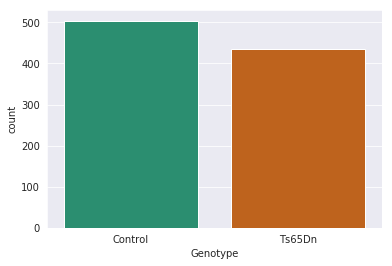

In [55]:
# count of different genotypes
sns.countplot(raw_data['Genotype'],palette = 'Dark2')

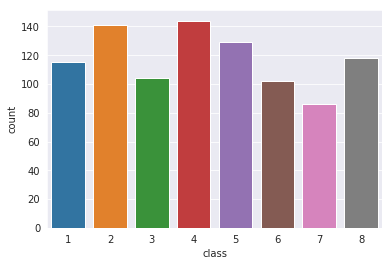

In [56]:
# checking for the distribution of our target class
sns.countplot(raw_data['class'])

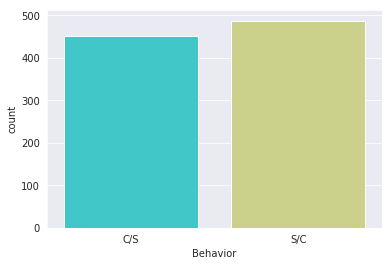

In [57]:
# checking the distribution for behavior
sns.countplot(raw_data['Behavior'],palette = 'rainbow')

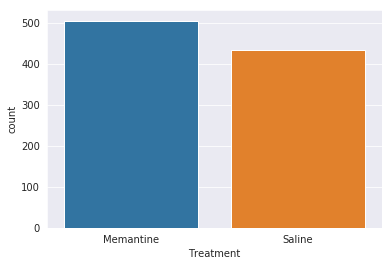

In [58]:
# count for different treatments
sns.countplot(raw_data['Treatment'])

In [59]:
# generating the correlation matrix
corrmat = raw_data.corr()

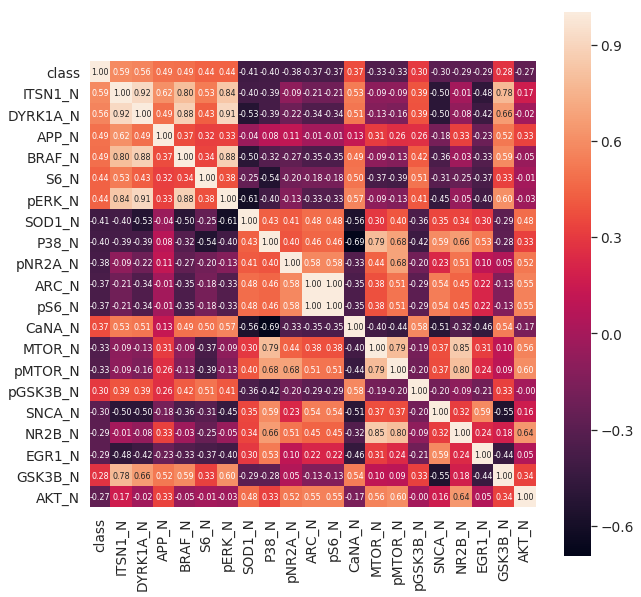

In [60]:
# checking for the top features that are highly correlated with the target feature
k = 21 #number of variables for heatmap
cols = corrmat.abs().nlargest(k, 'class')['class'].index
cm = np.corrcoef(raw_data[cols].values.T)
plt.figure(figsize = (10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


*We can see there are number of descriptive features that are highly correlated with each other. To overcome the problem of multi-collinearity we have make use of feature importance method (RFI) that will return us the most important features that are valuable to our model for prediction.*

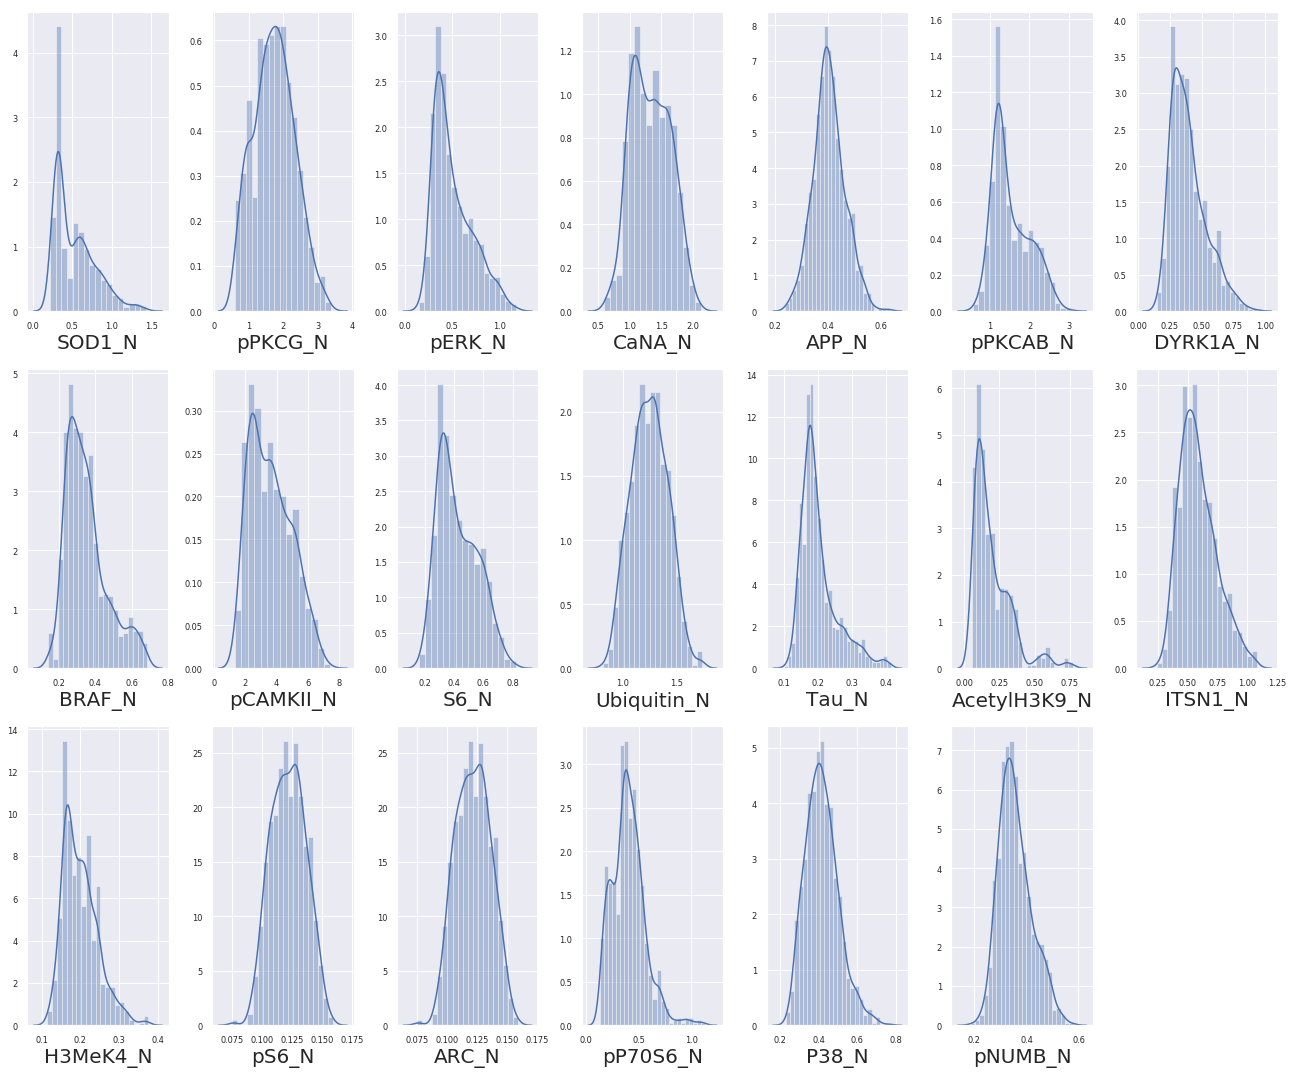

In [61]:
sns.set(font_scale=0.75)
plt.figure(figsize=(18,15), facecolor='white')
plotnumber = 1

# top 20 features in accordance with the feature importance 
for column in ['SOD1_N', 'pPKCG_N', 'pERK_N', 'CaNA_N', 'APP_N', 'pPKCAB_N','DYRK1A_N', 'BRAF_N', 'pCAMKII_N', 'S6_N', 'Ubiquitin_N', 'Tau_N',\
               'AcetylH3K9_N', 'ITSN1_N', 'H3MeK4_N', 'pS6_N', 'ARC_N', 'pP70S6_N','P38_N', 'pNUMB_N']:
    if plotnumber<=20 :     
        ax = plt.subplot(3,7,plotnumber)
        sns.distplot(raw_data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()
plt.show()


## Bivariate Analysis

### Exploring distribution of descriptive features with respect to target class

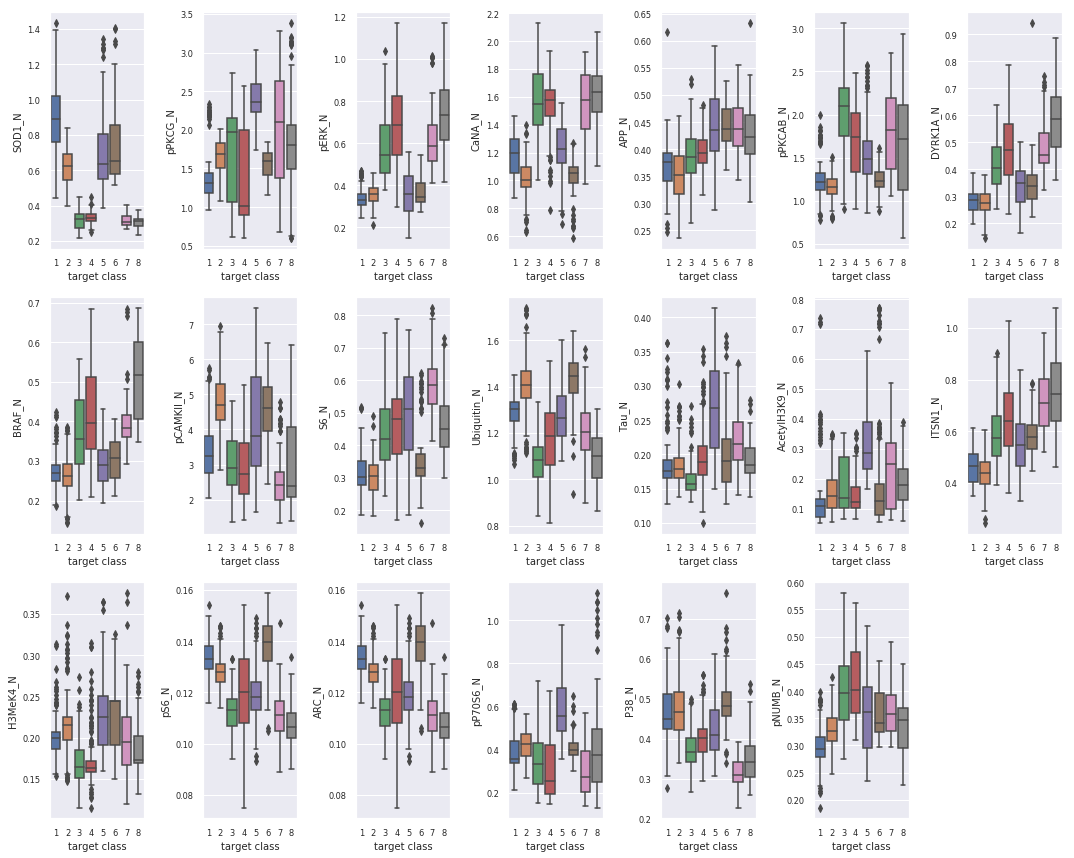

In [62]:

plt.figure(figsize=(15,12), facecolor='white')
plotnumber = 1

for column in ['SOD1_N', 'pPKCG_N', 'pERK_N', 'CaNA_N', 'APP_N', 'pPKCAB_N','DYRK1A_N', 'BRAF_N', 'pCAMKII_N', 'S6_N', 'Ubiquitin_N', 'Tau_N',\
                   'AcetylH3K9_N', 'ITSN1_N', 'H3MeK4_N', 'pS6_N', 'ARC_N', 'pP70S6_N','P38_N', 'pNUMB_N']:
    if plotnumber<=20 :     # as there are 11 columns in the data
        ax = plt.subplot(3,7,plotnumber)
        sns.boxplot('class', column, data = raw_data )
        plt.ylabel(column,fontsize=10)
        plt.xlabel('target class',fontsize=10)
       
    plotnumber+=1
plt.tight_layout()
plt.show()

It can be seen that most of the features are to able to distinguish classes on their behavior i.e. some proteins are able to separate the mices that are stimulated to learn from those who are not stimulated to learn wrt to their distribution. Very few proteins are able to separate the classes on the basis of Genotype.

We are going to explore which pairs of feature are able to distinguish between the different lables of our target class. For this we will create a correlation matrix with respect to every label which feature gives the most information.

In [63]:
df4 = raw_data.copy()

In [64]:
df4['Treatment'].unique()

array(['Memantine', 'Saline'], dtype=object)

In [65]:
df4['Genotype'].replace({'Control':0, 'Ts65Dn':1},inplace =True)
df4['Treatment'].replace({'Memantine':1, 'Saline':0},inplace= True)

In [66]:
corrmat22 = df4.corr()

In [67]:
df_top10 = raw_data.iloc[:,fs_indices_rfi[:10]]
print(df_top10.shape)
df_top10['class'] = target
print(df_top10.shape)
print(df_top10.head())

(939, 10)
(939, 11)
   SOD1_N  pPKCG_N  pERK_N  CaNA_N  ITSN1_N  pCAMKII_N  BRAF_N  DYRK1A_N  \
0   0.370    1.443   0.688   1.676    0.747      2.374   0.416     0.504   
1   0.342    1.439   0.695   1.744    0.689      2.292   0.400     0.515   
2   0.344    1.524   0.677   1.926    0.730      2.283   0.400     0.509   
3   0.345    1.612   0.583   1.701    0.617      2.152   0.386     0.442   
4   0.329    1.646   0.551   1.840    0.617      2.134   0.368     0.435   

   APP_N  Tau_N  class  
0  0.454  0.125      4  
1  0.431  0.134      4  
2  0.423  0.133      4  
3  0.411  0.123      4  
4  0.399  0.137      4  


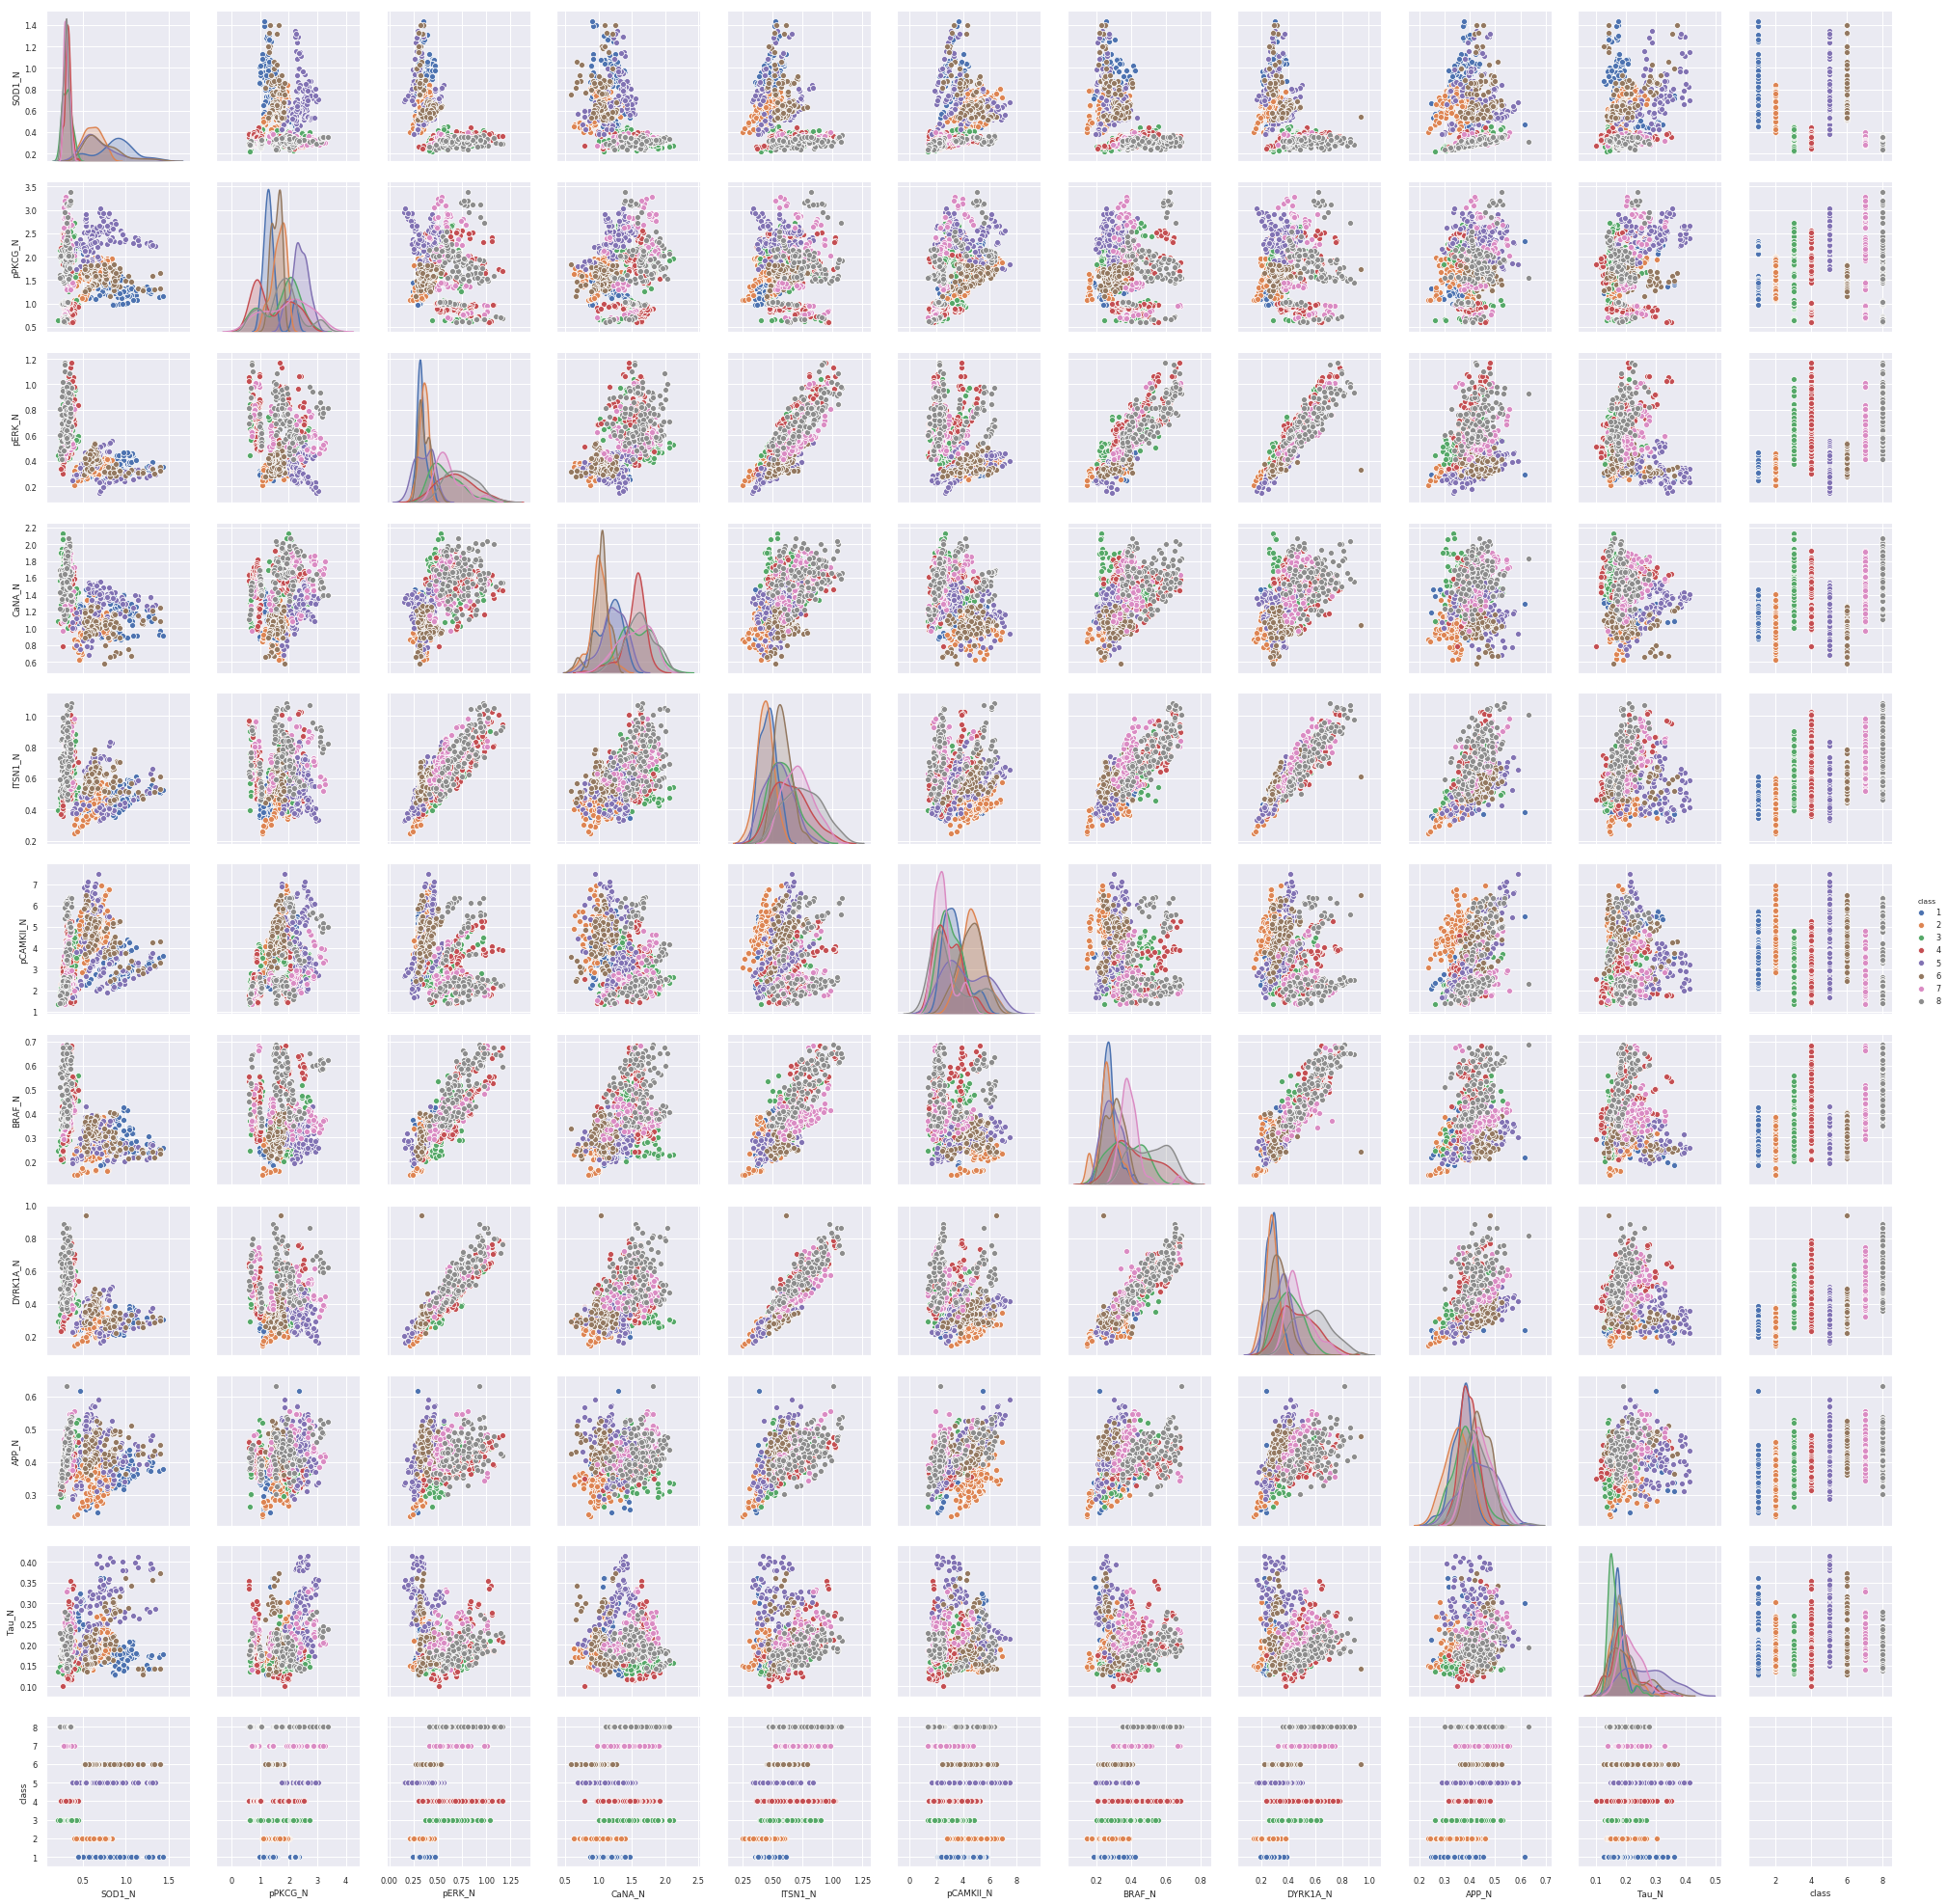

In [68]:
sns.pairplot(df_top10, hue = 'class')

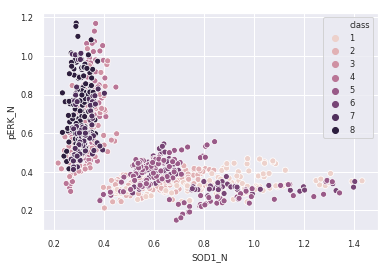

In [69]:
sns.scatterplot('SOD1_N','pERK_N',data=raw_data,hue = 'class',legend = 'full')

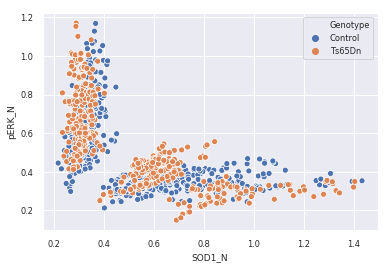

In [70]:
sns.scatterplot('SOD1_N','pERK_N',data=raw_data,hue = 'Genotype',legend = 'full')

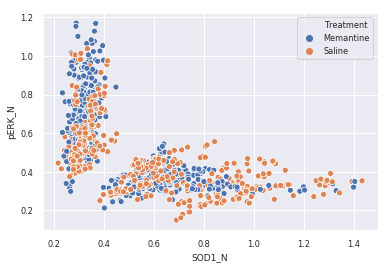

In [71]:
sns.scatterplot('SOD1_N','pERK_N',data=raw_data,hue = 'Treatment',legend = 'full')

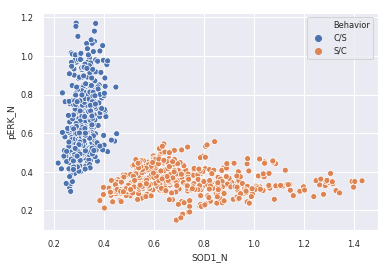

In [72]:
sns.scatterplot('SOD1_N','pERK_N',data=raw_data,hue = 'Behavior',legend = 'full')

SOD1_N and pERK_N are clearly able to separate the observation on Behavior.

In [73]:
### exploring the relations for genotype
corrmat22['Genotype'].nlargest(10)

Genotype        1.000000
class           0.860217
APP_N           0.522893
ITSN1_N         0.353661
Tau_N           0.348717
S6_N            0.346895
AcetylH3K9_N    0.340017
pPKCG_N         0.323872
DYRK1A_N        0.261645
H3AcK18_N       0.248429
Name: Genotype, dtype: float64

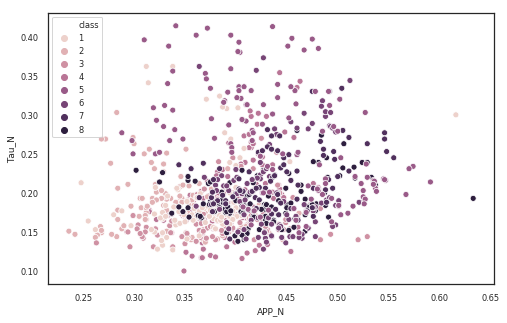

In [74]:
plt.figure(figsize=(8,5))
sns.set_style('white')
sns.scatterplot('APP_N','Tau_N',hue = 'class', data = raw_data , legend= 'full',ci = 105)

**We can clearly see that the proteins 'APP_N' and 'Tau_N' are able to separate majority of Control and Trisomic mices but with a small classification error due to overlapping.
All those that have low values for the both 'APP_N' and 'Tau_N' proteins belong to Control mices and those with high values belong to Trisomic. **

In [75]:
# Now exploring the relations for Treatment
corrmat22['Treatment'].nlargest(8)

Treatment    1.000000
BRAF_N       0.217907
IL1B_N       0.217693
pERK_N       0.210248
class        0.203874
pMTOR_N      0.191249
GluR3_N      0.182194
pELK_N       0.180254
Name: Treatment, dtype: float64

No feature alone gives any valuable information about the different class labels wrt to the Treatment. 

In [76]:
raw_data.groupby(['Behavior','Genotype'])['BRAF_N'].mean()

Behavior  Genotype
C/S       Control     0.402004
          Ts65Dn      0.461534
S/C       Control     0.268387
          Ts65Dn      0.296299
Name: BRAF_N, dtype: float64

In [77]:
raw_data.groupby(['Behavior','Genotype','Treatment'])['BRAF_N'].mean()

Behavior  Genotype  Treatment
C/S       Control   Memantine    0.425222
                    Saline       0.369856
          Ts65Dn    Memantine    0.509542
                    Saline       0.395663
S/C       Control   Memantine    0.262376
                    Saline       0.275757
          Ts65Dn    Memantine    0.306578
                    Saline       0.288171
Name: BRAF_N, dtype: float64

# Data Modelling

## K Nearest Neighbour 

### Feature selection (Hill Climbing Method)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [79]:
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = input[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target , test_size=0.4, random_state=0)
    clf = KNeighborsClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
        


Score with 1 selected features: 0.1622340425531915
Score with 2 selected features: 0.27925531914893614
Score with 3 selected features: 0.35106382978723405
Score with 4 selected features: 0.4601063829787234
Score with 5 selected features: 0.47606382978723405
Score with 6 selected features: 0.5186170212765957
Score with 7 selected features: 0.5824468085106383
Score with 8 selected features: 0.6648936170212766
Score with 9 selected features: 0.6648936170212766
Score with 10 selected features: 0.7792553191489362
Score with 11 selected features: 0.8271276595744681
Score with 12 selected features: 0.8271276595744681
Score with 13 selected features: 0.8271276595744681
Score with 14 selected features: 0.8377659574468085
Score with 15 selected features: 0.8856382978723404
Score with 16 selected features: 0.8909574468085106
Score with 17 selected features: 0.8909574468085106
Score with 18 selected features: 0.9175531914893617
Score with 19 selected features: 0.9228723404255319
Score with 20 sele

KNN classifier when build with default parameters gives best accuracy of 0.976 with 42 features. Now on these features we are hypertuning our model to further increase the accuracy of our model.

In [80]:
print("There are " + str(len(new_Ind)) + " features selected:")

There are 37 features selected:


In [81]:
index_KNN = new_Ind[:30]
print(new_Ind)
print(index_KNN)

[31, 43, 26, 74, 58, 59, 61, 51, 57, 10, 53, 2, 71, 27, 46, 15, 45, 19, 76, 70, 35, 38, 55, 33, 21, 39, 17, 7, 22, 54, 66, 60, 65, 50, 25, 1, 16]
[31, 43, 26, 74, 58, 59, 61, 51, 57, 10, 53, 2, 71, 27, 46, 15, 45, 19, 76, 70, 35, 38, 55, 33, 21, 39, 17, 7, 22, 54]


In [82]:
## Selecting only 30 features  as there is very little increase in the accuracy after that.

In [83]:
# names of the features that are contributing to the accuracy
input_columns[new_Ind[:30]]

array(['Bcatenin_N', 'NUMB_N', 'JNK_N', 'EGR1_N', 'GluR3_N', 'GluR4_N',
       'P3525_N', 'RRP1_N', 'GFAP_N', 'pERK_N', 'ARC_N', 'BDNF_N',
       'pCFOS_N', 'MEK_N', 'pPKCG_N', 'pNR2A_N', 'pGSK3B_N', 'AKT_N',
       'CaNA_N', 'pS6_N', 'pMTOR_N', 'NR2B_N', 'nNOS_N', 'MTOR_N',
       'CAMKII_N', 'pNUMB_N', 'pPKCAB_N', 'pCAMKII_N', 'CREB_N',
       'ERBB4_N'], dtype=object)

In [84]:
## checking the accuracy with selected number of features in a cross validated way with default parameters

In [85]:
X = input[:,new_Ind[:30]]
y = target

In [86]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=999)

In [87]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
from sklearn.model_selection import cross_val_score
cv_results_full = cross_val_score(estimator=clf,
                             X=X_test,
                             y=y_test, 
                             cv=cv_method, 
                             scoring='accuracy')

In [89]:
cv_results_full.mean()

0.7940545474607045

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(657, 30)
(282, 30)
(657,)
(282,)


### Hypertuning KNN

In [91]:
params_KNN = { 'p' : [1,2],
               'n_neighbors' : [5,10],
              'weights':['uniform','distance']
              }

In [92]:
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      n_jobs = -2,
                      return_train_score=True)

gs_KNN.fit(X_train,y_train)

Fitting 15 folds for each of 8 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 120 out of 120 | elapsed:   11.5s finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x7f6956bc8cc0>,
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'p': [1, 2], 'n_neighbors': [5, 10], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [93]:
gs_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='distance')

In [94]:
gs_KNN.best_score_

0.9634703196347032

In [95]:
## Building the new model with the best parameters
final_model_knn = KNeighborsClassifier(n_neighbors=5, p=1, weights='distance')
final_model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='distance')

In [96]:
y_pred = final_model_knn.predict(X_test)

In [97]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[42,  2,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  1,  0,  0,  2,  0],
       [ 0,  0,  0, 45,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  2,  0,  0,  0, 26,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  2],
       [ 0,  0,  0,  0,  0,  0,  0, 34]])

In [98]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        44
           2       0.90      1.00      0.95        36
           3       1.00      0.90      0.95        31
           4       0.98      0.94      0.96        48
           5       1.00      1.00      1.00        35
           6       1.00      0.93      0.96        28
           7       0.89      0.92      0.91        26
           8       0.89      1.00      0.94        34

   micro avg       0.96      0.96      0.96       282
   macro avg       0.96      0.96      0.96       282
weighted avg       0.96      0.96      0.96       282



In [99]:
metrics.recall_score(y_test,y_pred,average='micro')

0.9574468085106383

In [100]:
metrics.balanced_accuracy_score(y_test,y_pred)

0.9558649515806774

In [101]:


cv_results_full_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                             X=X_test,
                             y=y_test, 
                             cv=cv_method, 
                             scoring='accuracy')

In [102]:
cv_results_full_KNN

array([0.9       , 0.84210526, 0.84210526, 0.83636364, 0.77358491,
       0.9       , 0.80701754, 0.92982456, 0.89090909, 0.77358491,
       0.81666667, 0.85964912, 0.78947368, 0.92727273, 0.90566038])

In [103]:
cv_results_full_KNN.mean().round(3)

0.853

## Decision Tree 

In [104]:
# performing hill climbing with decision tree
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

from sklearn.tree import DecisionTreeClassifier  


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = input[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y , test_size=0.4, random_state=0)
    clf = DecisionTreeClassifier(random_state= 999)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.18351063829787234
Score with 2 selected features: 0.2526595744680851
Score with 3 selected features: 0.31117021276595747
Score with 4 selected features: 0.44148936170212766
Score with 5 selected features: 0.48936170212765956
Score with 6 selected features: 0.5478723404255319
Score with 7 selected features: 0.5664893617021277
Score with 8 selected features: 0.648936170212766
Score with 9 selected features: 0.6941489361702128
Score with 10 selected features: 0.699468085106383
Score with 11 selected features: 0.7021276595744681
Score with 12 selected features: 0.7207446808510638
Score with 13 selected features: 0.7367021276595744
Score with 14 selected features: 0.7526595744680851
Score with 15 selected features: 0.7632978723404256
Score with 16 selected features: 0.7978723404255319
Score with 17 selected features: 0.7978723404255319
Score with 18 selected features: 0.8111702127659575


In [105]:
print("There are " + str(len(new_Ind)) + " features selected:")
print(new_Ind)

There are 18 features selected:
[31, 43, 26, 74, 58, 51, 36, 10, 53, 34, 27, 46, 15, 19, 76, 70, 75, 35]


In [106]:
input_columns[new_Ind]

array(['Bcatenin_N', 'NUMB_N', 'JNK_N', 'EGR1_N', 'GluR3_N', 'RRP1_N',
       'DSCR1_N', 'pERK_N', 'ARC_N', 'P38_N', 'MEK_N', 'pPKCG_N',
       'pNR2A_N', 'AKT_N', 'CaNA_N', 'pS6_N', 'H3MeK4_N', 'pMTOR_N'],
      dtype=object)

In [107]:
## checking the accuracy with selected number of features in a cross validated way with default parameters

In [108]:
X = input[:,new_Ind]
y = target
X.shape

(939, 18)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=999)

In [110]:
clf = DecisionTreeClassifier(random_state= 999)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best')

In [111]:
cv_results_full = cross_val_score(estimator=clf,
                             X=X_test,
                             y=y_test, 
                             cv=cv_method, 
                             scoring='accuracy')

In [112]:
cv_results_full.mean()

0.6436703680298516

## Hyper-tuning DT

In [113]:
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,20,30],
             'min_samples_split': [2, 3]}

In [114]:
gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     n_jobs = -2,
                     scoring='accuracy')

gs_DT.fit(X_train, y_train);

Fitting 15 folds for each of 40 candidates, totalling 600 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 600 out of 600 | elapsed:   21.9s finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [115]:
gs_DT.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best')

In [116]:
gs_DT.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}

In [117]:
gs_DT.best_score_

0.7701674277016742

In [118]:
from sklearn.model_selection import cross_val_score

cv_results_full = cross_val_score(estimator=gs_DT.best_estimator_,
                             X=X_test,
                             y=y_test, 
                             cv=cv_method, 
                             scoring='accuracy')

In [119]:
cv_results_full

array([0.65      , 0.68421053, 0.63157895, 0.58181818, 0.58490566,
       0.65      , 0.66666667, 0.61403509, 0.63636364, 0.66037736,
       0.65      , 0.66666667, 0.64912281, 0.6       , 0.62264151])

In [120]:
cv_results_full.mean().round(3)

0.637

In [121]:
y_pred = gs_DT.best_estimator_.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.851063829787234

In [122]:
metrics.confusion_matrix(y_test, y_pred)

array([[37,  2,  0,  0,  1,  4,  0,  0],
       [ 0, 34,  0,  0,  0,  2,  0,  0],
       [ 1,  0, 24,  3,  0,  0,  0,  3],
       [ 0,  0,  2, 33,  3,  0,  0, 10],
       [ 0,  1,  0,  2, 30,  2,  0,  0],
       [ 0,  2,  0,  0,  0, 26,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 23,  3],
       [ 0,  0,  0,  1,  0,  0,  0, 33]])

In [123]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.84      0.90        44
           2       0.87      0.94      0.91        36
           3       0.92      0.77      0.84        31
           4       0.85      0.69      0.76        48
           5       0.88      0.86      0.87        35
           6       0.76      0.93      0.84        28
           7       1.00      0.88      0.94        26
           8       0.67      0.97      0.80        34

   micro avg       0.85      0.85      0.85       282
   macro avg       0.87      0.86      0.86       282
weighted avg       0.87      0.85      0.85       282



## Decision Tree model with 30 features

In [124]:
X = input[:,index_KNN]
y = target
X.shape

(939, 30)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=999)

In [126]:
df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,20,30],
             'min_samples_split': [2, 3]}

In [127]:
gs_DT_30F = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     n_jobs = -2,
                     scoring='accuracy')

gs_DT.fit(X_train, y_train);

Fitting 15 folds for each of 40 candidates, totalling 600 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 600 out of 600 | elapsed:   30.3s finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [128]:
from sklearn.model_selection import cross_val_score

cv_results_full_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                             X=X_test,
                             y=y_test, 
                             cv=cv_method, 
                             scoring='accuracy')

In [129]:
cv_results_full_DT.mean()

0.676186091300292

## Comparison of Model

Let's now conduct paired t-tests to see if the difference between the best tree and best nearest neighbor models with 30 features is statistically significant.

For a paired t-test in Python, we use the stats.ttest_rel function inside the scipy module and look at the p-values. At a 95% significance level, if the p-value is smaller than 0.05, we conclude that the difference is statistically significant.

In [130]:
from scipy import stats

print(stats.ttest_rel(cv_results_full_DT, cv_results_full_KNN).pvalue.round(3))

0.0


**Since the p-value is less than 0.5 therefore difference is statistically significant and the performances of these two classifiers are not comparable. Thus, KNN model is best model among the two.**

## Conclusion

KNN model outperforms DT model in classifying different classes with a much higher accuracy score. Not all the proteins profiles that deals with the associate learning in our dataset gives much information about the different classes. Only a handful number of proteins impact the learning abilities (SOD1_N impact the learning behavior most) in mice. Control mice when context-shock were able to learn with or without treatment of drug (memantine), however tri-somic mice only learns when they were injected with memantine. From our study we can also conclude how ineffective Decision model becomes when exposed to continuous numerical values. Recommended model for predictive analysis of this dataset is K Nearest Neighbour classifier which has the least error classification rate among the two built for our study. 



## References

* Archive.ics.uci.edu. 2020. UCI Machine Learning Repository: Mice Protein Expression Data Set. [online] Available at: <https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression> [Accessed 1 June 2020].
* Higuera, C., Gardiner, K. and Cios, K., 2015. Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLOS ONE, 10(6), p.e0129126. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0129126#sec011
* Ahmed, M., Dhanasekaran, A., Block, A., Tong, S., Costa, A., Stasko, M. and Gardiner, K., 2015. Protein Dynamics Associated with Failed and Rescued Learning in the Ts65Dn Mouse Model of Down Syndrome. PLOS ONE, 10(3), p.e0119491. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0119491
